In [2]:
import os
import csv
import scipy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from iSCAMS_class import iSCAMS
from iSCAMS_calibration import iSCAMS_calibrate
from astroML.plotting import hist
from numpy.polynomial.polynomial import polyfit

In [3]:
Path = r"./Contrasts/Standards/DRP1/"
Filenames = []
for filename in os.listdir(Path):
    filename_sample = os.path.join(os.path.expanduser(Path),filename)
    assert os.path.exists(filename_sample)
    Filenames.append(filename_sample)
    
print("Standard Files:",Filenames)

Standard Files: ['./Contrasts/Standards/DRP1/ADH_STD_Cf.npy', './Contrasts/Standards/DRP1/ADH_STD_Cf_rescaled.npy', './Contrasts/Standards/DRP1/BetaA_STD_1_Cf.npy', './Contrasts/Standards/DRP1/BetaA_STD_1_Cf_rescaled.npy', './Contrasts/Standards/DRP1/BetaA_STD_Cf.npy', './Contrasts/Standards/DRP1/BetaA_STD_Cf_rescaled.npy']


In [4]:
Cf_ADH = np.load(Filenames[0])
ADH_cal = iSCAMS_calibrate(Cf_ADH,"ADH")
Cf_BetaA = np.load(Filenames[2])
BetaA_cal = iSCAMS_calibrate(Cf_BetaA,"BetaA")

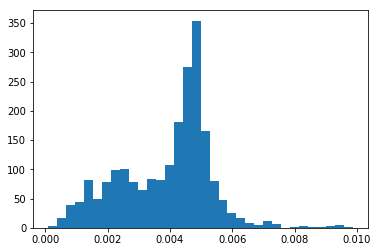

Number of Gaussians:
2
Gaussian 1
Centre:
0.002
Amplitude:
120
Width:
0.001
Gaussian 2
Centre:
0.005
Amplitude:
350
Width:
0.001


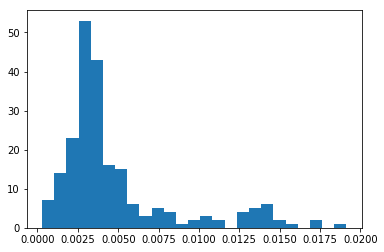

Number of Gaussians:
1
Gaussian 1
Centre:
0.003
Amplitude:
50
Width:
0.001


In [5]:
ADH_cal.Manual_Gauss()
BetaA_cal.Manual_Gauss()

C:\Users\pkgroup\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


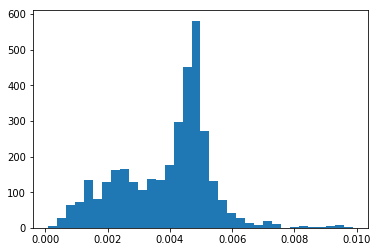

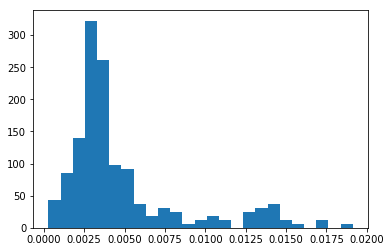

In [6]:
ADH_cal.Fit_Gaussian()
BetaA_cal.Fit_Gaussian()

In [8]:
x = []
y = []
for i in range(0,len(ADH_cal.popt),3):
    x.append(ADH_cal.popt[i])
y.append(ADH_cal.Peaks)

for i in range(0,len(BetaA.popt),3):
    x.append(BetaA.popt[i])
y.append(BetaA.Peaks)

NameError: name 'ADH' is not defined

In [ ]:
b, m = polyfit(x,y, 1)

x_n = np.arange(0.001,0.01,0.001)
y_n = b + m*x

plt.plot(x, y, '.')
plt.plot(x_n, y_n, '-')
plt.show()

print("Gradient:",m)
print("Intercept:",b)